<a href="https://colab.research.google.com/github/Kiara-Wu/17-CHL5230-F23/blob/main/17_CHL5230_F23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Datathon 2**

Preprocessing

In [ ]:
from google.colab import files
import io
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

imported=files.upload()
df1 = pd.read_csv(io.BytesIO(imported['Mortality Dataset.csv']))

Saving Mortality Dataset.csv to Mortality Dataset.csv


In [ ]:
df1.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [ ]:
# create a dataframe using pandas
df11 = pd.DataFrame(df1)


In [ ]:
#check if there exist missing value
df11.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
# descriptive statistics of dataset
print(df11.describe())
binary_counts = ['anaemia','high_blood_pressure','diabetes', 'smoking','sex','DEATH_EVENT']
for column in binary_counts:
    print(df11[column].value_counts())

              age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction      platelets  serum_creatinine  serum_sodium  \
count         299.000000     299.000000         299.00000    299.000000   
mean           38.083612  263358.029264           1.39388    136.625418   
std            11.834841   97804.236869           1.03451      4.412477   
min            14.000000   25100.000000           0.50000   

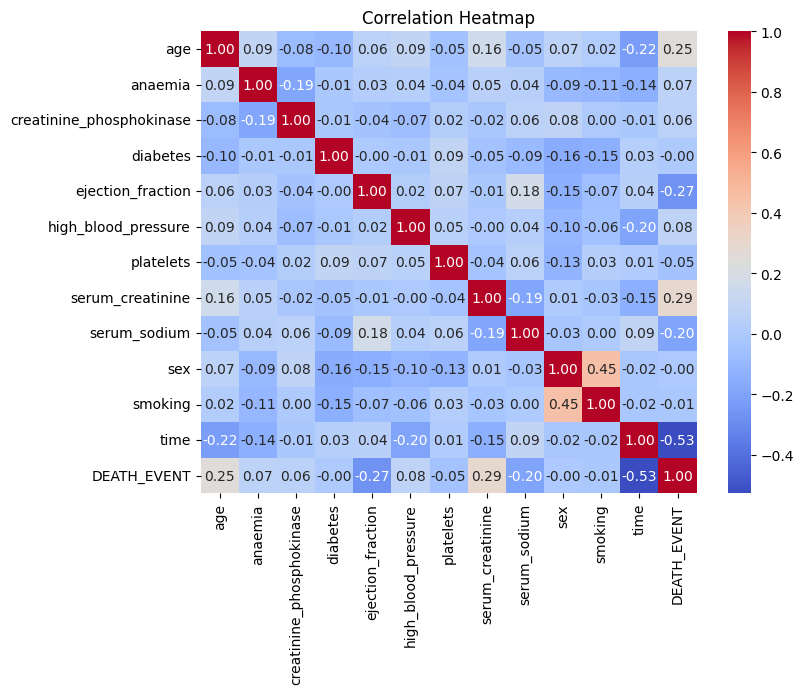

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# correlation heatmap

correlation_matrix = df11.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

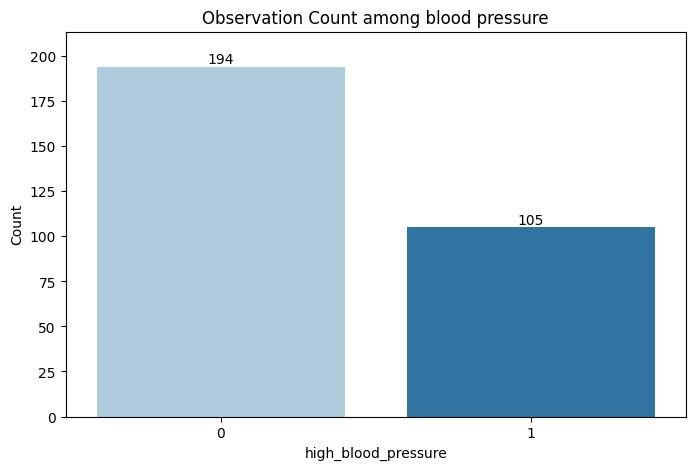

In [ ]:
# counts of observations in each blood pressure group
sns.set_palette("Paired")

# create a new dataframe to store counts of observations in each group
high_blood_pressure_counts = df11.groupby('high_blood_pressure').size().reset_index(name='Count')

# plot data
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x=high_blood_pressure_counts['high_blood_pressure'],
            y=high_blood_pressure_counts['Count'],
            ax=ax).set(title='Observation Count among blood pressure')

# annotate
ax.bar_label(ax.containers[0], label_type='edge')

# pad the spacing between the number and the edge of the figure
ax.margins(y=0.1)

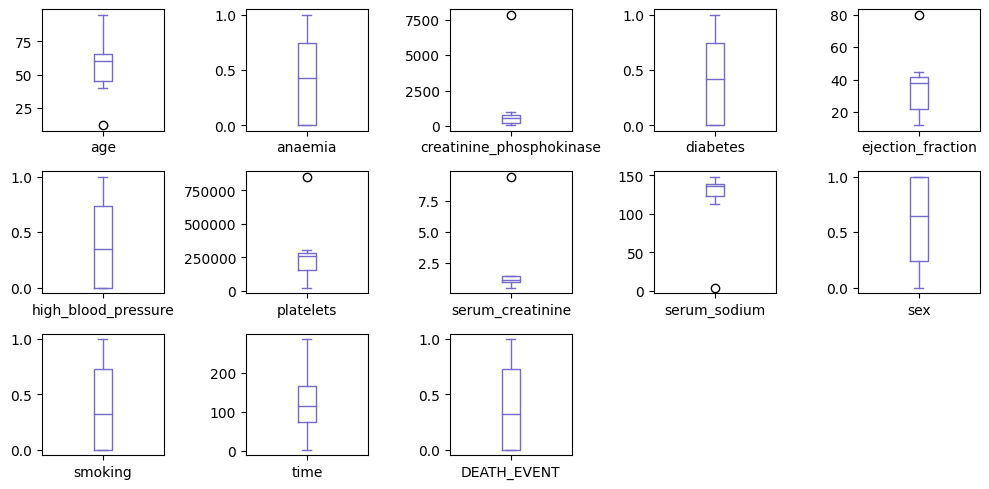

In [ ]:
# Drop the 'count' row for better visualization
description = description.drop('count')

# Visual representation of data.describe
description.plot(kind='box', subplots=True, layout=(3, 5), figsize=(10, 5), color='#7569c9')
plt.tight_layout()
plt.show()

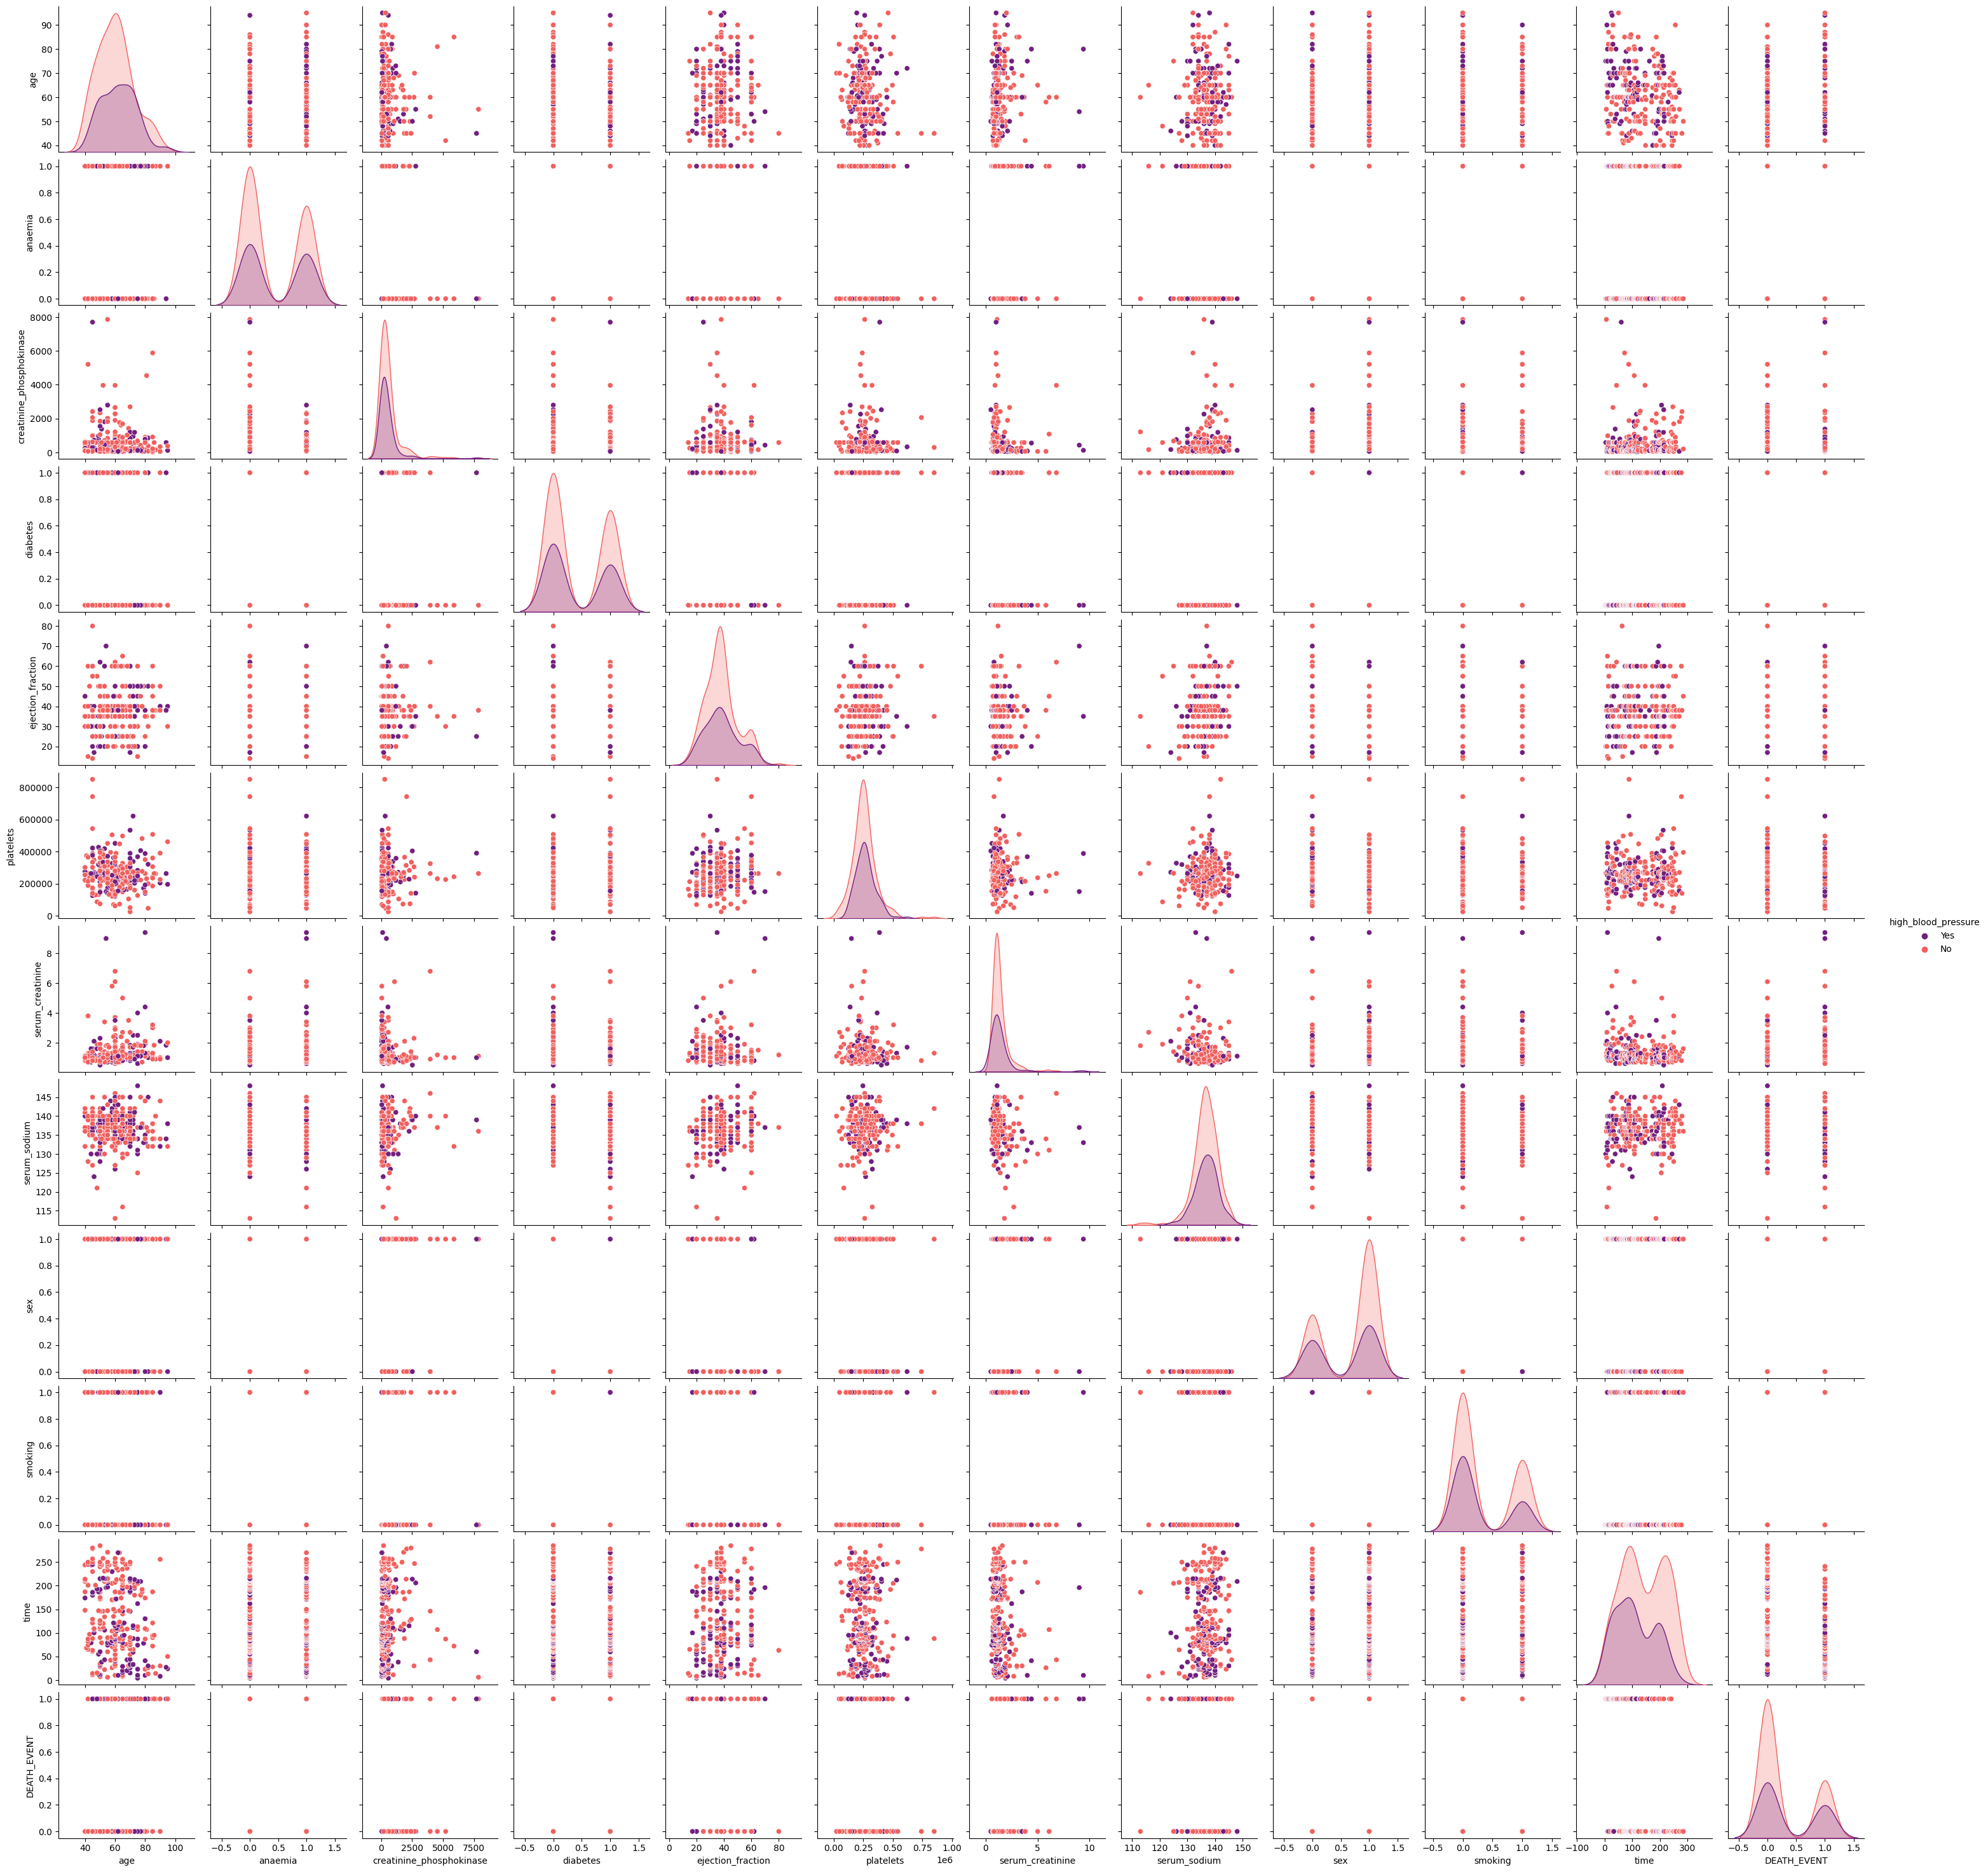

In [ ]:
# Display pair plot for data visualization
sns.pairplot(df11, hue='high_blood_pressure', palette="magma")
plt.show()

**Features vs. Hypertension (KNN)**

Test/Training & Scaling

In [ ]:
df11['high_blood_pressure'] = df11['high_blood_pressure'].map({0: "No",1:"Yes"})

In [ ]:
#'anaemia', 'creatinine_phosphokinase', 'diabetes',	'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium',	'sex', 'smoking'
X = df11[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',	'ejection_fraction', 'serum_sodium',	'sex', 'smoking']] # removed time and mortality
y = df11['high_blood_pressure']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Determine best K-value

Text(0, 0.5, 'Error Rate')

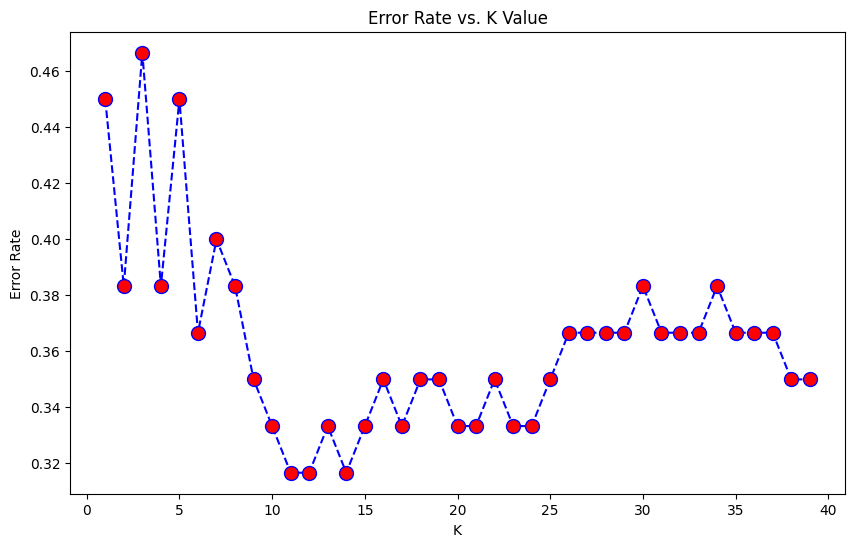

In [ ]:
import matplotlib.pyplot as plt

error_rate = []
for k in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred= knn.predict(X_test)
    error_rate.append(np.mean(y_pred != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Model & Evaluation

[[39  0]
 [19  2]]
              precision    recall  f1-score   support

          No       0.67      1.00      0.80        39
         Yes       1.00      0.10      0.17        21

    accuracy                           0.68        60
   macro avg       0.84      0.55      0.49        60
weighted avg       0.79      0.68      0.58        60



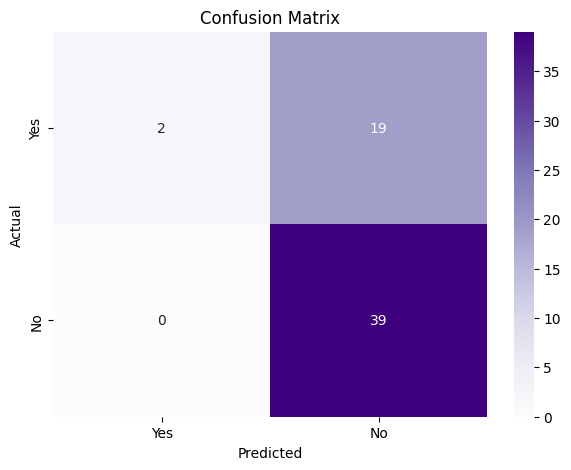

In [ ]:
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


classes = df11['high_blood_pressure'].unique()
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred, labels=classes), cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Logistic Regression - Outcome: Mortality



1. Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

2. Load the data

In [ ]:
imported=files.upload()
df1 = pd.read_csv(io.BytesIO(imported['Mortality Dataset.csv']))
df1.head()


Saving Mortality Dataset.csv to Mortality Dataset.csv


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


3. Preparing the data

In [ ]:
X = df1.drop('DEATH_EVENT', axis = 1)
y = df1 ['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split (X, y , test_size=0.2, random_state=42)
scaler = StandardScaler()
X_scaled=scaler.fit_transform(X)



4. Building the logistic regression model

In [ ]:
log_reg = LogisticRegression(penalty ='l2', C=1.0, solver = 'liblinear')
log_reg.fit(X_train,y_train)


LogisticRegression(solver='liblinear')

In [ ]:
y_pred= log_reg.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test,y_pred)
print("Confusion Matrix:")
print (conf_matrix)
print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[33  2]
 [11 14]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.94      0.84        35
           1       0.88      0.56      0.68        25

    accuracy                           0.78        60
   macro avg       0.81      0.75      0.76        60
weighted avg       0.80      0.78      0.77        60



5. Visualizing the results

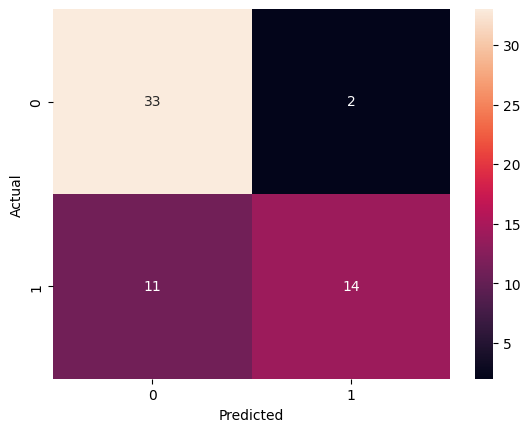

In [ ]:
sns.heatmap(conf_matrix, annot= True, fmt = 'd')
plt.ylabel ('Actual')
plt.xlabel ('Predicted')
plt.show()


6. Further Exploration of Features

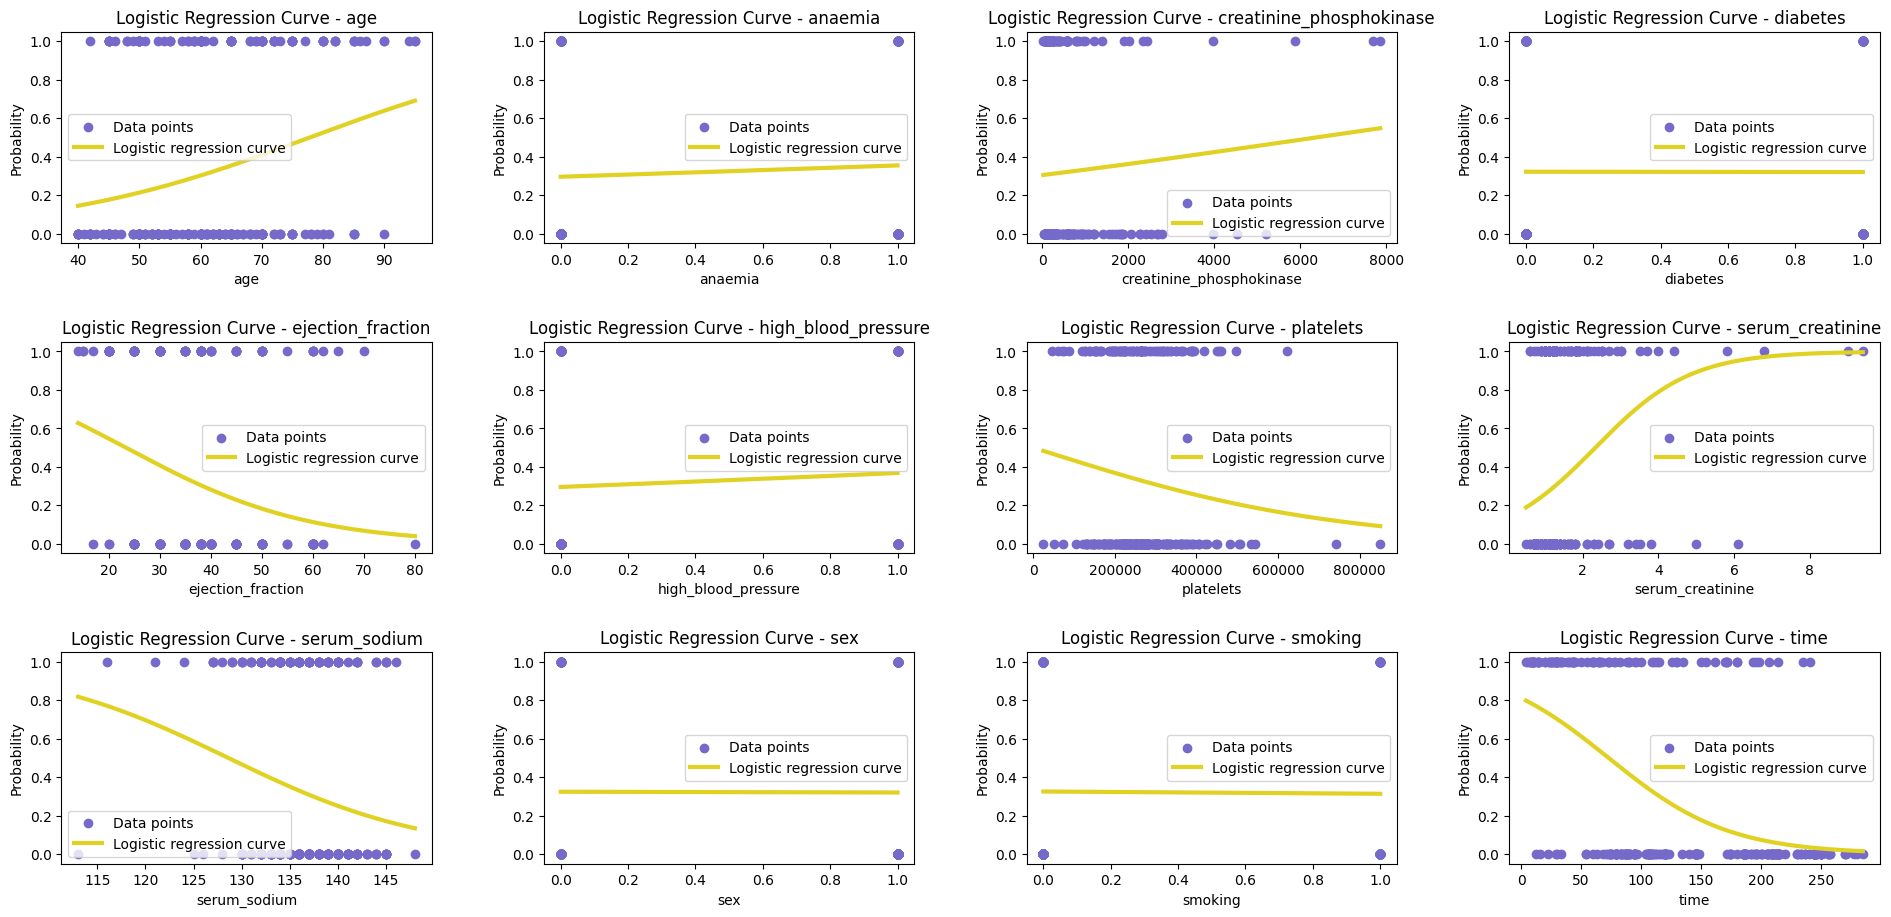

In [ ]:
log_reg = LogisticRegression()
fig,axs = plt.subplots (3,4, figsize = (20,10))
fig.tight_layout(pad=5.0)
for i, feature in enumerate (df1.columns [:-1]):
  row = i//4
  col = i % 4
  X = df1 [[feature]]
  y = df1 [ 'DEATH_EVENT']
  log_reg.fit(X, y)
  x_test = np.linspace(X.min(), X.max(), 300)
  prob = log_reg.predict_proba(x_test)[:,1]
  axs[row,col].scatter(X,y, color ='#7569c9', label = 'Data points')
  axs[row, col].plot(x_test, prob, color='#e0d122', lw=3, label='Logistic regression curve' )
  axs[row, col].set_title(f'Logistic Regression Curve - {feature}')
  axs[row, col].set_xlabel(feature)
  axs[row, col].set_ylabel('Probability')
  axs[row, col].legend()
plt.show()



In [ ]:
import statsmodels.api as sm
import pandas as pd
X = df1.drop('DEATH_EVENT', axis = 1)
y = df1['DEATH_EVENT']
X = sm.add_constant(X)
log_reg = sm.Logit (y,X).fit()
summary = log_reg.summary()
print(summary)

Optimization terminated successfully.
         Current function value: 0.367147
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            DEATH_EVENT   No. Observations:                  299
Model:                          Logit   Df Residuals:                      286
Method:                           MLE   Df Model:                           12
Date:                Mon, 02 Oct 2023   Pseudo R-squ.:                  0.4151
Time:                        15:53:17   Log-Likelihood:                -109.78
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                 3.771e-27
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       10.1849      5.657      1.801      0.072      -0.902